### Exploring the Data to Get a Bird-Eye View

In [ ]:
import pandas as pd
import json
from tqdm import tqdm 
from bs4 import BeautifulSoup
import xml.etree.ElementTree as E1T
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from pathlib import Path
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [18]:
df = pd.read_csv('data/writers.csv')

In [19]:
#changing value types
df['AnswerCount'] = df['AnswerCount'].fillna(-1)
df['AnswerCount'] = df['AnswerCount'].astype(int)
df['PostTypeId'] = df['PostTypeId'].astype(int)
df['Id'] = df['Id'].astype(int)
df.set_index('Id', inplace = True, drop = False)

#adding meaure of length for a post
df['full_text'] = df['Title'].str.cat(df['body_text'], sep = ' ', na_rep = '')
df['text_len'] = df['full_text'].str.len()

# a question is a post of ID 1
df['is_question'] = df['PostTypeId'] ==1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34330 entries, 1 to 42885
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             34330 non-null  int64  
 1   AcceptedAnswerId       4124 non-null   float64
 2   AnswerCount            34330 non-null  int32  
 3   Body                   34256 non-null  object 
 4   ClosedDate             969 non-null    object 
 5   CommentCount           34330 non-null  int64  
 6   CommunityOwnedDate     186 non-null    object 
 7   CreationDate           34330 non-null  object 
 8   FavoriteCount          3307 non-null   float64
 9   Id                     34330 non-null  int32  
 10  LastActivityDate       34330 non-null  object 
 11  LastEditDate           11201 non-null  object 
 12  LastEditorDisplayName  614 non-null    object 
 13  LastEditorUserId       10648 non-null  float64
 14  OwnerDisplayName       1976 non-null   object 
 15  Ow

In [27]:
df.head(2)

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,ParentId,PostTypeId,Score,Tags,Title,ViewCount,body_text,full_text,text_len,is_question
Id,,,,,,,,,,,,,,,,,,,,,
1,0,15.0,9,"<p>I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.</p>\n\n<p>Are there some resources on how to start becoming a writer?</p>\n\n<p>I'm thinking something with tips and easy exercises to get the ball rolling.</p>\n",NaN,7,NaN,2010-11-18T20:40:32.857,17.0,1,...,NaN,1,32,<resources><first-time-author>,What are some online guides for starting writers?,1274.0,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n","What are some online guides for starting writers? I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",352,True
2,1,16.0,7,"<p>What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?</p>\n\n<p>For example, writing in the first person you are always <em>following</em> a character, while in the third person you can ""jump"" between story lines.</p>\n",NaN,0,NaN,2010-11-18T20:42:31.513,5.0,2,...,NaN,1,20,<fiction><grammatical-person><third-person>,What is the difference between writing in the first and the third person?,8426.0,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n","What is the difference between writing in the first and the third person? What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n",331,True


In [24]:
df = df[df['PostTypeId'].isin([1,2])]

In [25]:
questions_with_accepted_answers = df[df['is_question'] & ~(df['AcceptedAnswerId'].isna())]
q_and_a = questions_with_accepted_answers.join(df['body_text'], on = 'AcceptedAnswerId', how = 'left', rsuffix = '_answer')
pd.options.display.max_colwidth = 500

q_and_a[['body_text', 'body_text_answer']][:5]

,body_text,body_text_answer
Id,,
1,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n","When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re..."
2,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n","With a story in first person, you are intending the reader to become much more attached to the main character. Since the reader sees what that character sees and feels what that character feels, the reader will have an emotional investment in that character. Third person does not have this close tie; a reader can become emotionally invested but it will not be as strong as it will be in first person.\nContrarily, you cannot have multiple point characters when you use first person without ex..."
3,"I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n","Try and find a list of agents who write in your genre. Check out their websites!\nFind out if they are accepting new clients. If they aren't, then check out another agent. But if they are, try sending them a few chapters from your story, a brief, and a short cover letter asking them to represent you.\nIn the cover letter mention your previous publication credits. If sent via post, then I suggest you give them a means of reply, whether it be an email or a stamped, addressed envelope.\nAgents ..."
7,"I keep hearing about literary fiction, and how it is so much better than genre fiction. What exactly is literary fiction?\n","There's always the good old wikipedia definition: http://en.wikipedia.org/wiki/Literary_fiction\nMy take on it is that it is often used to mean ""serious"" fiction (whatever that is), as opposed to fiction that is merely ""entertainment"". It often seems to be thrown about in the context of snobbery (that is, someone may not ""read that airport bookshop rubbish"" because they like literary fiction), but I don't know if people really say those sorts of things, or if it's just the impression that th..."
11,I heard a writer talking about pantsing a story. What does that mean?\n,"""Pantsing"" refers to simply writing a story without much, if any, preparation or pre-writing -- just writing down whatever comes to you, and letting the story go (and wander) wherever it feels like at the moment you're writing it down.\nAs for etymology, I'm not sure where it comes from. In general, ""pantsing"" refers to a prank in which you pull someone's pants down, but I'm not sure how that plays into the idea of writing (aside from the fact that both can be surprising).\n"


In [32]:
df = df.join(df[['Id','Title','body_text', 'text_len','Score', 'AcceptedAnswerId']], on = 'ParentId', how = 'left', rsuffix = '_question' )

In [33]:
df[df['Id_question']==1].head(2)

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,body_text,full_text,text_len,is_question,Id_question,Title_question,body_text_question,text_len_question,Score_question,AcceptedAnswerId_question
Id,,,,,,,,,,,,,,,,,,,,,
8,5,NaN,-1,"<p>BeginningWriters.com has some good articles for beginning writers.</p>\n\n<p><a href=""http://beginningwriters.com/"">http://beginningwriters.com/</a></p>\n",NaN,0,NaN,2010-11-18T20:45:45.533,NaN,8,...,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,97,False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",352.0,32.0,15.0
15,10,NaN,-1,"<p>When I'm thinking about where I learned most how to write, I think that <em>reading</em> was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I ...",NaN,3,NaN,2010-11-18T20:50:16.683,NaN,15,...,"When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re...","When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when r...",962,False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",352.0,32.0,15.0


In [35]:
#Data Quantity and Distribution 

has_accepted_answers = df[df['is_question'] & ~(df['AcceptedAnswerId'].isna())]
received_answers = df[df['is_question'] & (df['AnswerCount']!=0)]
no_answers = df[df['is_question'] & (df['AnswerCount']==0) & (df['AcceptedAnswerId'].isna())]

print("%s total questions\n %s received at least one answer \n %s received accepted answer and\n %s received no answers" % (
    len(df['is_question']), len(received_answers), len(has_accepted_answers), len(no_answers)
))

33650 total questions
 7827 received at least one answer 
 4124 received accepted answer and
 144 received no answers


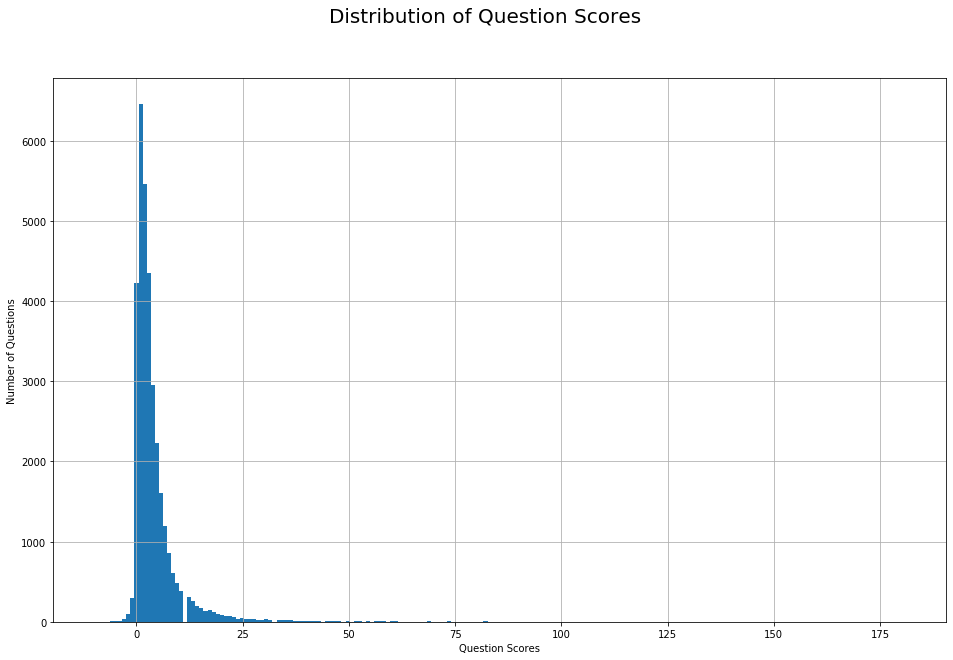

In [37]:
fig = plt.figure(figsize = (16,10))
fig.suptitle('Distribution of Question Scores', size = 20)
plt.xlabel('Question Scores')
plt.ylabel('Number of Questions')
df['Score'].hist(bins = 200)

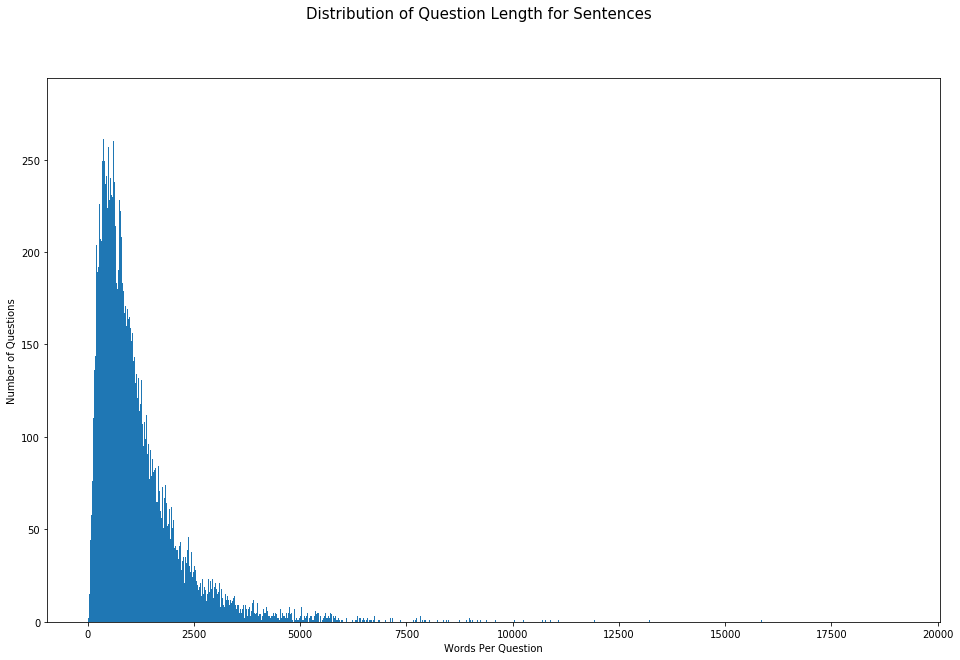

In [39]:
fig = plt.figure(figsize = (16,10))
fig.suptitle('Distribution of Question Length for Sentences', size = 15)
plt.xlabel('Words Per Question')
plt.ylabel('Number of Questions')
q_len = plt.hist(df['text_len'], bins = 2000, log=False)

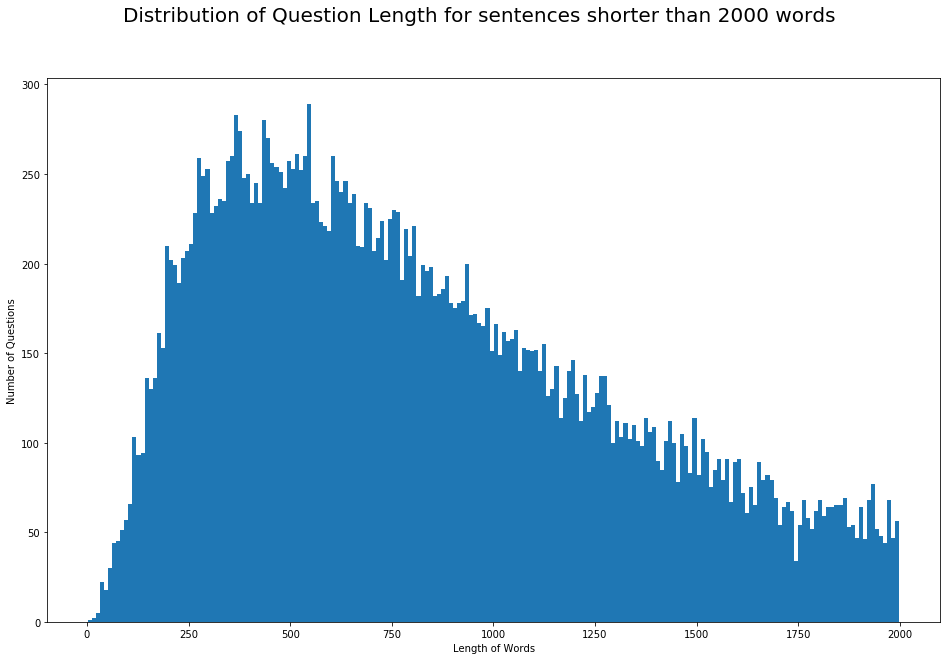

In [40]:
fig = plt.figure(figsize = (16,10))
fig.suptitle(
'Distribution of Question Length for sentences shorter than 2000 words', size = 20)
plt.xlabel('Length of Words')
plt.ylabel('Number of Questions')
q_len_trunc = plt.hist(df[df['text_len']<2000]['text_len'], bins = 200, log = False)


Text(0, 0.5, 'Percentage of Sentences')

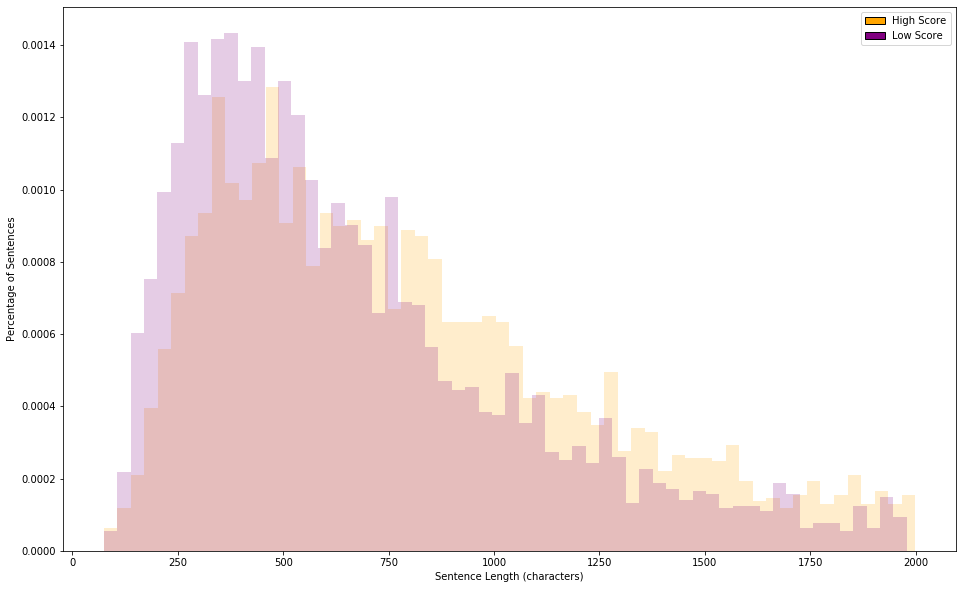

In [67]:
high_score = df['Score']>df['Score'].median()
normal_length = df['text_len']<2000

ax = df[df['is_question'] & high_score & normal_length]['text_len'].hist(
    bins = 60, density = True, histtype = 'stepfilled', color = 'orange', linewidth = 3,
    grid = False, figsize = (16,10), alpha=0.2

)

df[df['is_question'] & ~high_score & normal_length]['text_len'].hist(
    bins = 60, density = True, histtype = 'stepfilled', color = 'purple', linewidth = 3, 
    grid = False, alpha = 0.2

)

handles = [
    Rectangle((0,0), 1, 1, color = c, ec = 'k') for c in ['orange', 'purple']
]
labels = ['High Score', 'Low Score']
plt.legend(handles, labels)
ax.set_xlabel('Sentence Length (characters)')
ax.set_ylabel('Percentage of Sentences')

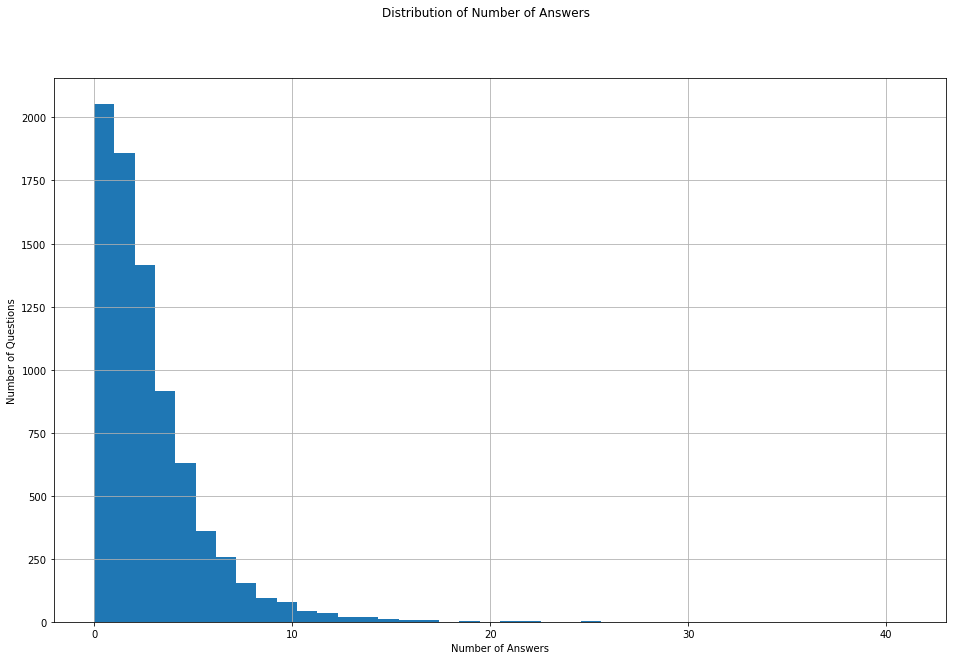

In [44]:
fig = plt.figure(figsize = (16,10))
fig.suptitle('Distribution of Number of Answers')
plt.xlabel('Number of Answers')
plt.ylabel('Number of Questions')
hist = df[df['is_question']]['AnswerCount'].hist(bins = 40)

Text(0.5, 1.0, 'Answer Counts as a Fraction of QUestion Score')

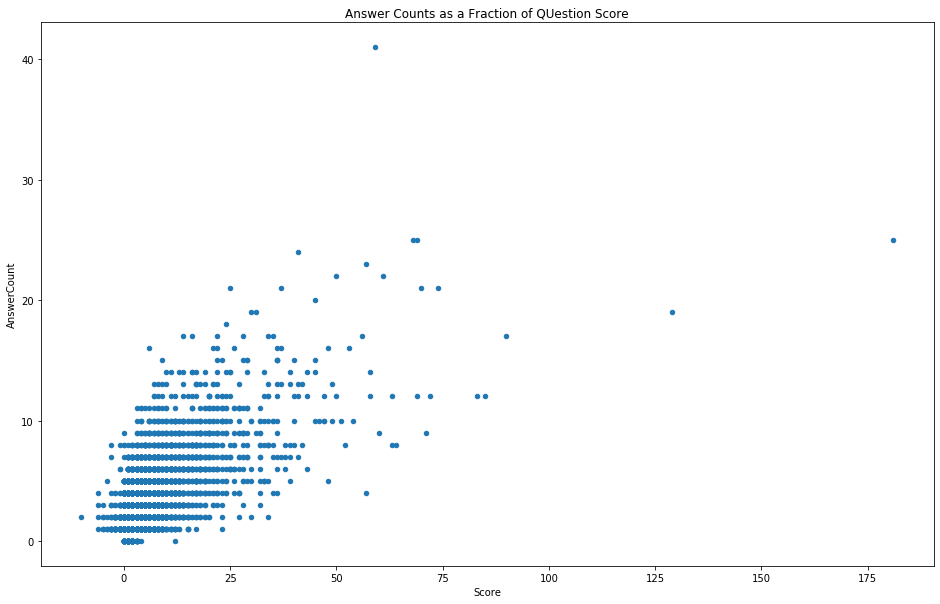

In [45]:
scatter = df[df['is_question']][['Score','AnswerCount']].plot(x = 'Score', y = 'AnswerCount', kind = 'scatter', figsize = (16,10))
ax.set_xlabel('Score')
ax.set_ylabel('Num Answers')
scatter.set_title('Answer Counts as a Fraction of QUestion Score')

Text(0, 0.5, 'Percentage of Sentences')

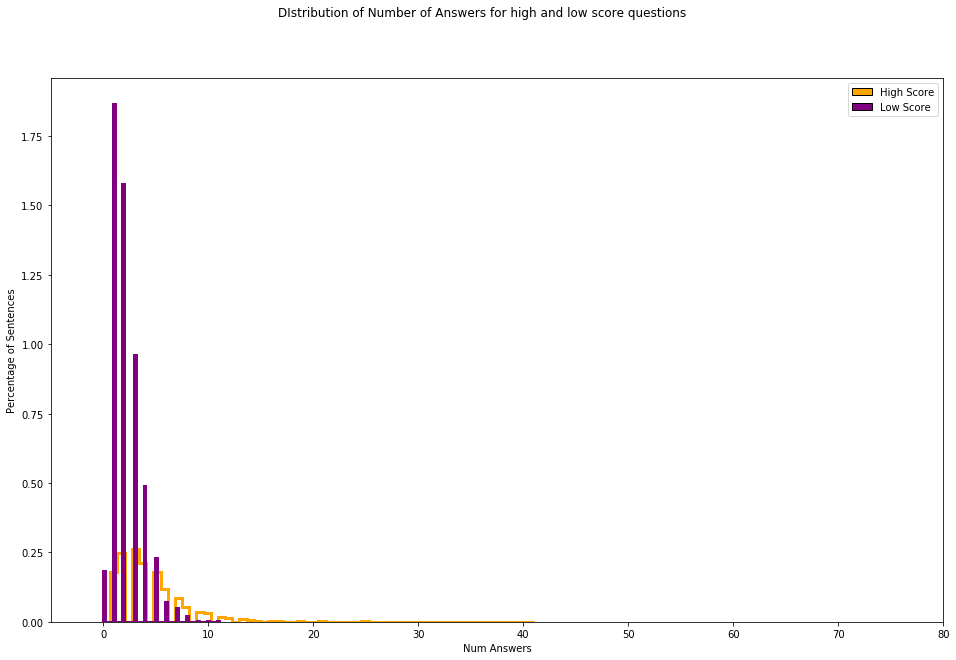

In [72]:
fig = plt.figure(figsize = (16, 10))
fig.suptitle('DIstribution of Number of Answers for high and low score questions')
plt.xlim(-5, 80)

ax = df[df['is_question'] & (df['Score'] > df['Score'].median())]['AnswerCount'].hist(bins = 60, density = True, histtype = 'step',
                                                                                     color = 'orange',linewidth = 3, grid = False, figsize = (16,10))

df[df['is_question'] & ~(df['Score']>df['Score'].median())]['AnswerCount'].hist(bins = 60, density = True, histtype = 'step', 
                                                                               color = 'purple', linewidth = 3, grid = False)

labels = ['High Score', 'Low Score']
plt.legend(handles, labels)
ax.set_xlabel('Num Answers')
ax.set_ylabel('Percentage of Sentences')

In [56]:
df['Title'].str.cat(df['body_text'], sep = " ", na_rep = "")

Id
1                                                                                                                                                        What are some online guides for starting writers? I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n
2                                                                                                                                                                              What is the difference between writing in the first and the third person? What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can "jump" be

In [68]:
df[df["is_question"]][["Score", "AnswerCount"]]

,Score,AnswerCount
Id,,
1,32,9
2,20,7
3,34,5
5,28,7
7,21,10
...,...,...
42869,1,2
42875,2,2
42879,1,1
